In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Task 1: Loading and Inspecting the Data

We will be working with a dataset of audiobooks downloaded from audible.in from 1998 to 2025 (pre-planned releases). [Source](https://www.kaggle.com/datasets/snehangsude/audible-dataset)

The first thing we will do is load the raw audible data.

### Instructions:
* Using pandas, read the `audible_raw.csv` file that is located inside the `data` folder in our local directory. Assign to `audible`.
* Show the first few rows of the `audible` data frame.

In [2]:
# Load the audible_raw.csv file
# Update the file path to the correct location of the CSV file
audible = pd.read_csv('data/audible_raw.csv')
# View the first rows of the dataframe
print(audible.head())

                                         name  ...   price
0                  Geronimo Stilton #11 & #12  ...  468.00
1                            The Burning Maze  ...  820.00
2                                The Deep End  ...  410.00
3                        Daughter of the Deep  ...  615.00
4  The Lightning Thief: Percy Jackson, Book 1  ...  820.00

[5 rows x 8 columns]


### 💾 The data

- "name" - The name of the audiobook.
- "author" - The audiobook's author.
- "narrator" - The audiobook's narrator.
- "time" -  The audiobook's duration, in hours and minutes.
- "releasedate" -  The date the audiobook was published.
- "language" -  The audiobook's language.
- "stars" -  The average number of stars (out of 5) and the number of ratings (if available).
- "price" -  The audiobook's price in INR (Indian Rupee).

 We can use the `.info()` method to inspect the data types of the columns

In [3]:
# Inspect the columns' data types
print (audible.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         87489 non-null  object
 1   author       87489 non-null  object
 2   narrator     87489 non-null  object
 3   time         87489 non-null  object
 4   releasedate  87489 non-null  object
 5   language     87489 non-null  object
 6   stars        87489 non-null  object
 7   price        87489 non-null  object
dtypes: object(8)
memory usage: 5.3+ MB
None


## Task 2: Clean text data in Author and Narrator columns

We will start cleaning some of the text columns like `author` and `narrator`. We can remove the `Writtenby:` and `Narratedby:` portions of the text in those columns.

For this, we will use the `.str.replace()` method

### Instructions:
* Remove 'Writtenby:' from the `author` column
* Remove 'Narratedby:' from the `narrator` column
* Check the results

In [4]:
# Remove Writtenby: from the author column
audible['author'] = audible['author'].str.replace('Writtenby:', '')
# Remove Narratedby: from the narrator column
audible['narrator'] = audible['narrator'].str.replace('Narratedby:', '')
# Check the results
assert audible['author'].str.contains('Writtenby:').any() == False
assert audible['narrator'].str.contains('Narratedby:').any() == False

## Task 3: Extract number of stars and ratings from Stars column.

The `stars` column combines the number of stars and the number of ratins. Let's turn this into numbers and split it into two columns: `rating_stars` and `n_ratings`.

First we will use the `.sample()` method to get a glimpse at the type of entries in that column.

In [5]:
# Get a glimpse of the stars column
print(audible['stars'].sample())


60171    Not rated yet
Name: stars, dtype: object


Since there are many instances of `Not rated yet`, let's filter them out and sample again:

In [6]:
# Explore the values of the star column that are not 'Not rated yet'
print(audible.loc[audible['stars'] != 'Not rated yet', 'stars'].sample())

13824    5 out of 5 stars1 rating
Name: stars, dtype: object


As a first step, we can replace the instances of `Not rated yet` with `NaN`

In [7]:
# Replace 'Not rated yet' with NaN
audible.loc[audible['stars'] == 'Not rated yet', 'stars'] = np.nan

We can use `.str.extract()` to get the number of stars and the number of ratings into their own columns.

### Instructions:
* Extract the number of stars into the `rating_stars` column
* Extract the number of ratings into the `n_ratings` column
* Convert both new columns to float

In [8]:
# Extract number of stars into rating_stars and turn into float
rating_stars = audible['stars'].str.extract(r"^(.*?)(?= out of)").astype(float)
audible['rating_stars'] = rating_stars 
# Replace the comma, extract number of ratings into n_ratings and turn into float
n_ratings = audible['stars'].str.extract(r"stars(\d+)").astype(float)
audible['n_ratings'] = n_ratings 
# Examine the new rating_stars and n_ratings columns
print(audible[['stars', 'rating_stars', 'n_ratings']])

                               stars  rating_stars  n_ratings
0         5 out of 5 stars34 ratings           5.0       34.0
1       4.5 out of 5 stars41 ratings           4.5       41.0
2       4.5 out of 5 stars38 ratings           4.5       38.0
3       4.5 out of 5 stars12 ratings           4.5       12.0
4      4.5 out of 5 stars181 ratings           4.5      181.0
...                              ...           ...        ...
87484                            NaN           NaN        NaN
87485                            NaN           NaN        NaN
87486                            NaN           NaN        NaN
87487                            NaN           NaN        NaN
87488                            NaN           NaN        NaN

[87489 rows x 3 columns]


As a last step, let's delete the `stars` column using the `.drop` command:

In [9]:
# Drop the stars column
audible.drop(columns=['stars'], inplace=True)

# Check the results
print(audible.columns)


Index(['name', 'author', 'narrator', 'time', 'releasedate', 'language',
       'price', 'rating_stars', 'n_ratings'],
      dtype='object')


## Task 4: Change data types

Another important step is to have our data in the correct data types

### Instructions:
* Set `price` to float
* Turn `rating_stars` to category
* Convert `releasedate` to datetime

In [10]:
# Explore the price column
print(audible['price'].head())
print(audible['price'].describe())
print(audible['price'].isnull().sum())
print(audible['price'].unique())

0    468.00
1    820.00
2    410.00
3    615.00
4    820.00
Name: price, dtype: object
count      87489
unique      1011
top       586.00
freq        5533
Name: price, dtype: object
0
['468.00' '820.00' '410.00' ... '810.00' '710.00' '544.00']


We need to get rid of the comma and the word 'Free' before we can convert the data.

In [11]:
# Replace the comma with ''
audible['price'] = audible['price'].str.replace(',', '')
# Replace 'Free' with '0'
audible['price'] = audible['price'].str.replace('Free', '0')
# Turn price to float
audible['price'] = audible['price'].astype('float')

* Turn `rating_stars` to category

Since `stars` can only take a small number of discrete values, the best data type for the column is `category`.

Let's first look at the unique values in that column to confirm:

In [12]:
# Look at the unique values in the rating_stars column
print(audible['rating_stars'].unique())

[5.  4.5 4.  nan 3.5 3.  1.  2.  2.5 1.5]


We can now use `.astype` to change the data type.

In [13]:
# Turn rating_stars to category
audible['rating_stars'] = audible['rating_stars'].astype('category')

* Convert `releasedate` date to datetime

Here we will use the `to_datetime()` function to turn the dates into datetime objects:

In [14]:
# Convert releasedate to datetime
audible['releasedate'] = pd.to_datetime(audible['releasedate'], format = '%d-%m-%y')
# Inspect the dataframe 
print(audible['releasedate'].describe())
print(audible.info())

count                   87489
unique                   5058
top       2018-05-16 00:00:00
freq                      773
first     1998-12-27 00:00:00
last      2025-11-14 00:00:00
Name: releasedate, dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   name          87489 non-null  object        
 1   author        87489 non-null  object        
 2   narrator      87489 non-null  object        
 3   time          87489 non-null  object        
 4   releasedate   87489 non-null  datetime64[ns]
 5   language      87489 non-null  object        
 6   price         87489 non-null  float64       
 7   rating_stars  15072 non-null  category      
 8   n_ratings     15072 non-null  float64       
dtypes: category(1), datetime64[ns](1), float64(2), object(5)
memory usage: 5.4+ MB
None


## Task 5: Extract hours and minutes from the `time` column

The `time` column combines the number of hours and minutes into one column. We want to transform and consolidate the information into a new `time_minutes` column.

In [15]:
# Explore the values in the time column
print(audible['time'])
print(audible['time'].describe())
print(audible['time'].isnull().sum())

0         2 hrs and 20 mins
1         13 hrs and 8 mins
2          2 hrs and 3 mins
3        11 hrs and 16 mins
4                    10 hrs
                ...        
87484     7 hrs and 34 mins
87485     10 hrs and 7 mins
87486     19 hrs and 4 mins
87487      4 hrs and 8 mins
87488       6 hrs and 1 min
Name: time, Length: 87489, dtype: object
count      87489
unique      2284
top       2 mins
freq         372
Name: time, dtype: object
0


Let's see what other ways they have encoded `min` or `minutes`:

In [16]:
min_list = ['min', 'mins', 'minutes']
for min_element in min_list:
    print(min_element, ':', audible['time'].str.contains(min_element).sum())

min : 86146
mins : 84436
minutes : 0


We can see that we need to fix the following:
* hr, hrs -> consolidate as `hr`
* min, mins -> consolidate as `min`
* Less than 1 minute -> round to 1 min

In [17]:
# Replace hrs, mins, and 'Less than 1 minute'
audible['time'] = audible['time'].str.replace('hrs', 'hr')
audible['time'] = audible['time'].str.replace('mins', 'min')
audible['time'] = audible['time'].str.replace('Less than 1 minute', '1 min')

Let's see how it looks now:

In [18]:
# Check the results
print(audible['time'])


0         2 hr and 20 min
1         13 hr and 8 min
2          2 hr and 3 min
3        11 hr and 16 min
4                   10 hr
               ...       
87484     7 hr and 34 min
87485     10 hr and 7 min
87486     19 hr and 4 min
87487      4 hr and 8 min
87488      6 hr and 1 min
Name: time, Length: 87489, dtype: object


The next step is to extract the number of hours and minutes from the text, then combine in a new `time_mins` column.

### Instructions: 
* Extract the number of hours from `time`. Assign to the `hours` variable.
* Extract the number of minutes from `time`. Assign to the `mins` variable.
* Create the `time_mins` column combining hours and minutes.

In [19]:
# Extract the number of hours, turn to integer
audible['hours'] = audible['time'].str.extract(r'(\d+)\s*hr').fillna(0).astype(int)

# Extract the number of minutes, turn to integer
audible['mins'] = audible['time'].str.extract(r'(\d+)\s*min').fillna(0).astype(int)

# Combine hours and minutes into the time_mins column
audible['time_mins'] = audible['hours'] * 60 + audible['mins']

# Check the results
audible[['time', 'hours', 'mins', 'time_mins']]

,time,hours,mins,time_mins
0,2 hr and 20 min,2,20,140
1,13 hr and 8 min,13,8,788
2,2 hr and 3 min,2,3,123
3,11 hr and 16 min,11,16,676
4,10 hr,10,0,600
...,...,...,...,...
87484,7 hr and 34 min,7,34,454
87485,10 hr and 7 min,10,7,607
87486,19 hr and 4 min,19,4,1144
87487,4 hr and 8 min,4,8,248


And as final step, let's delete the columns we don't need any more:

In [20]:
# Drop the time column
audible.drop(columns=['time', 'hours', 'mins'], inplace=True)


Here is how our dataframe looks now:

In [21]:
# Inspect the dataframe 
print(audible.head())
print(audible.info())
print(audible.describe())

                                         name  ... time_mins
0                  Geronimo Stilton #11 & #12  ...       140
1                            The Burning Maze  ...       788
2                                The Deep End  ...       123
3                        Daughter of the Deep  ...       676
4  The Lightning Thief: Percy Jackson, Book 1  ...       600

[5 rows x 9 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   name          87489 non-null  object        
 1   author        87489 non-null  object        
 2   narrator      87489 non-null  object        
 3   releasedate   87489 non-null  datetime64[ns]
 4   language      87489 non-null  object        
 5   price         87489 non-null  float64       
 6   rating_stars  15072 non-null  category      
 7   n_ratings     15072 non-null  float64       
 8  

## Task 6: Check data ranges

Another important step is to confirm that the values in our columns are in the expected ranges and that we don't have out-of-range values.

Let's create a histogram of the numeric columns to visually inspect ht ranges and the shape of the distribution:

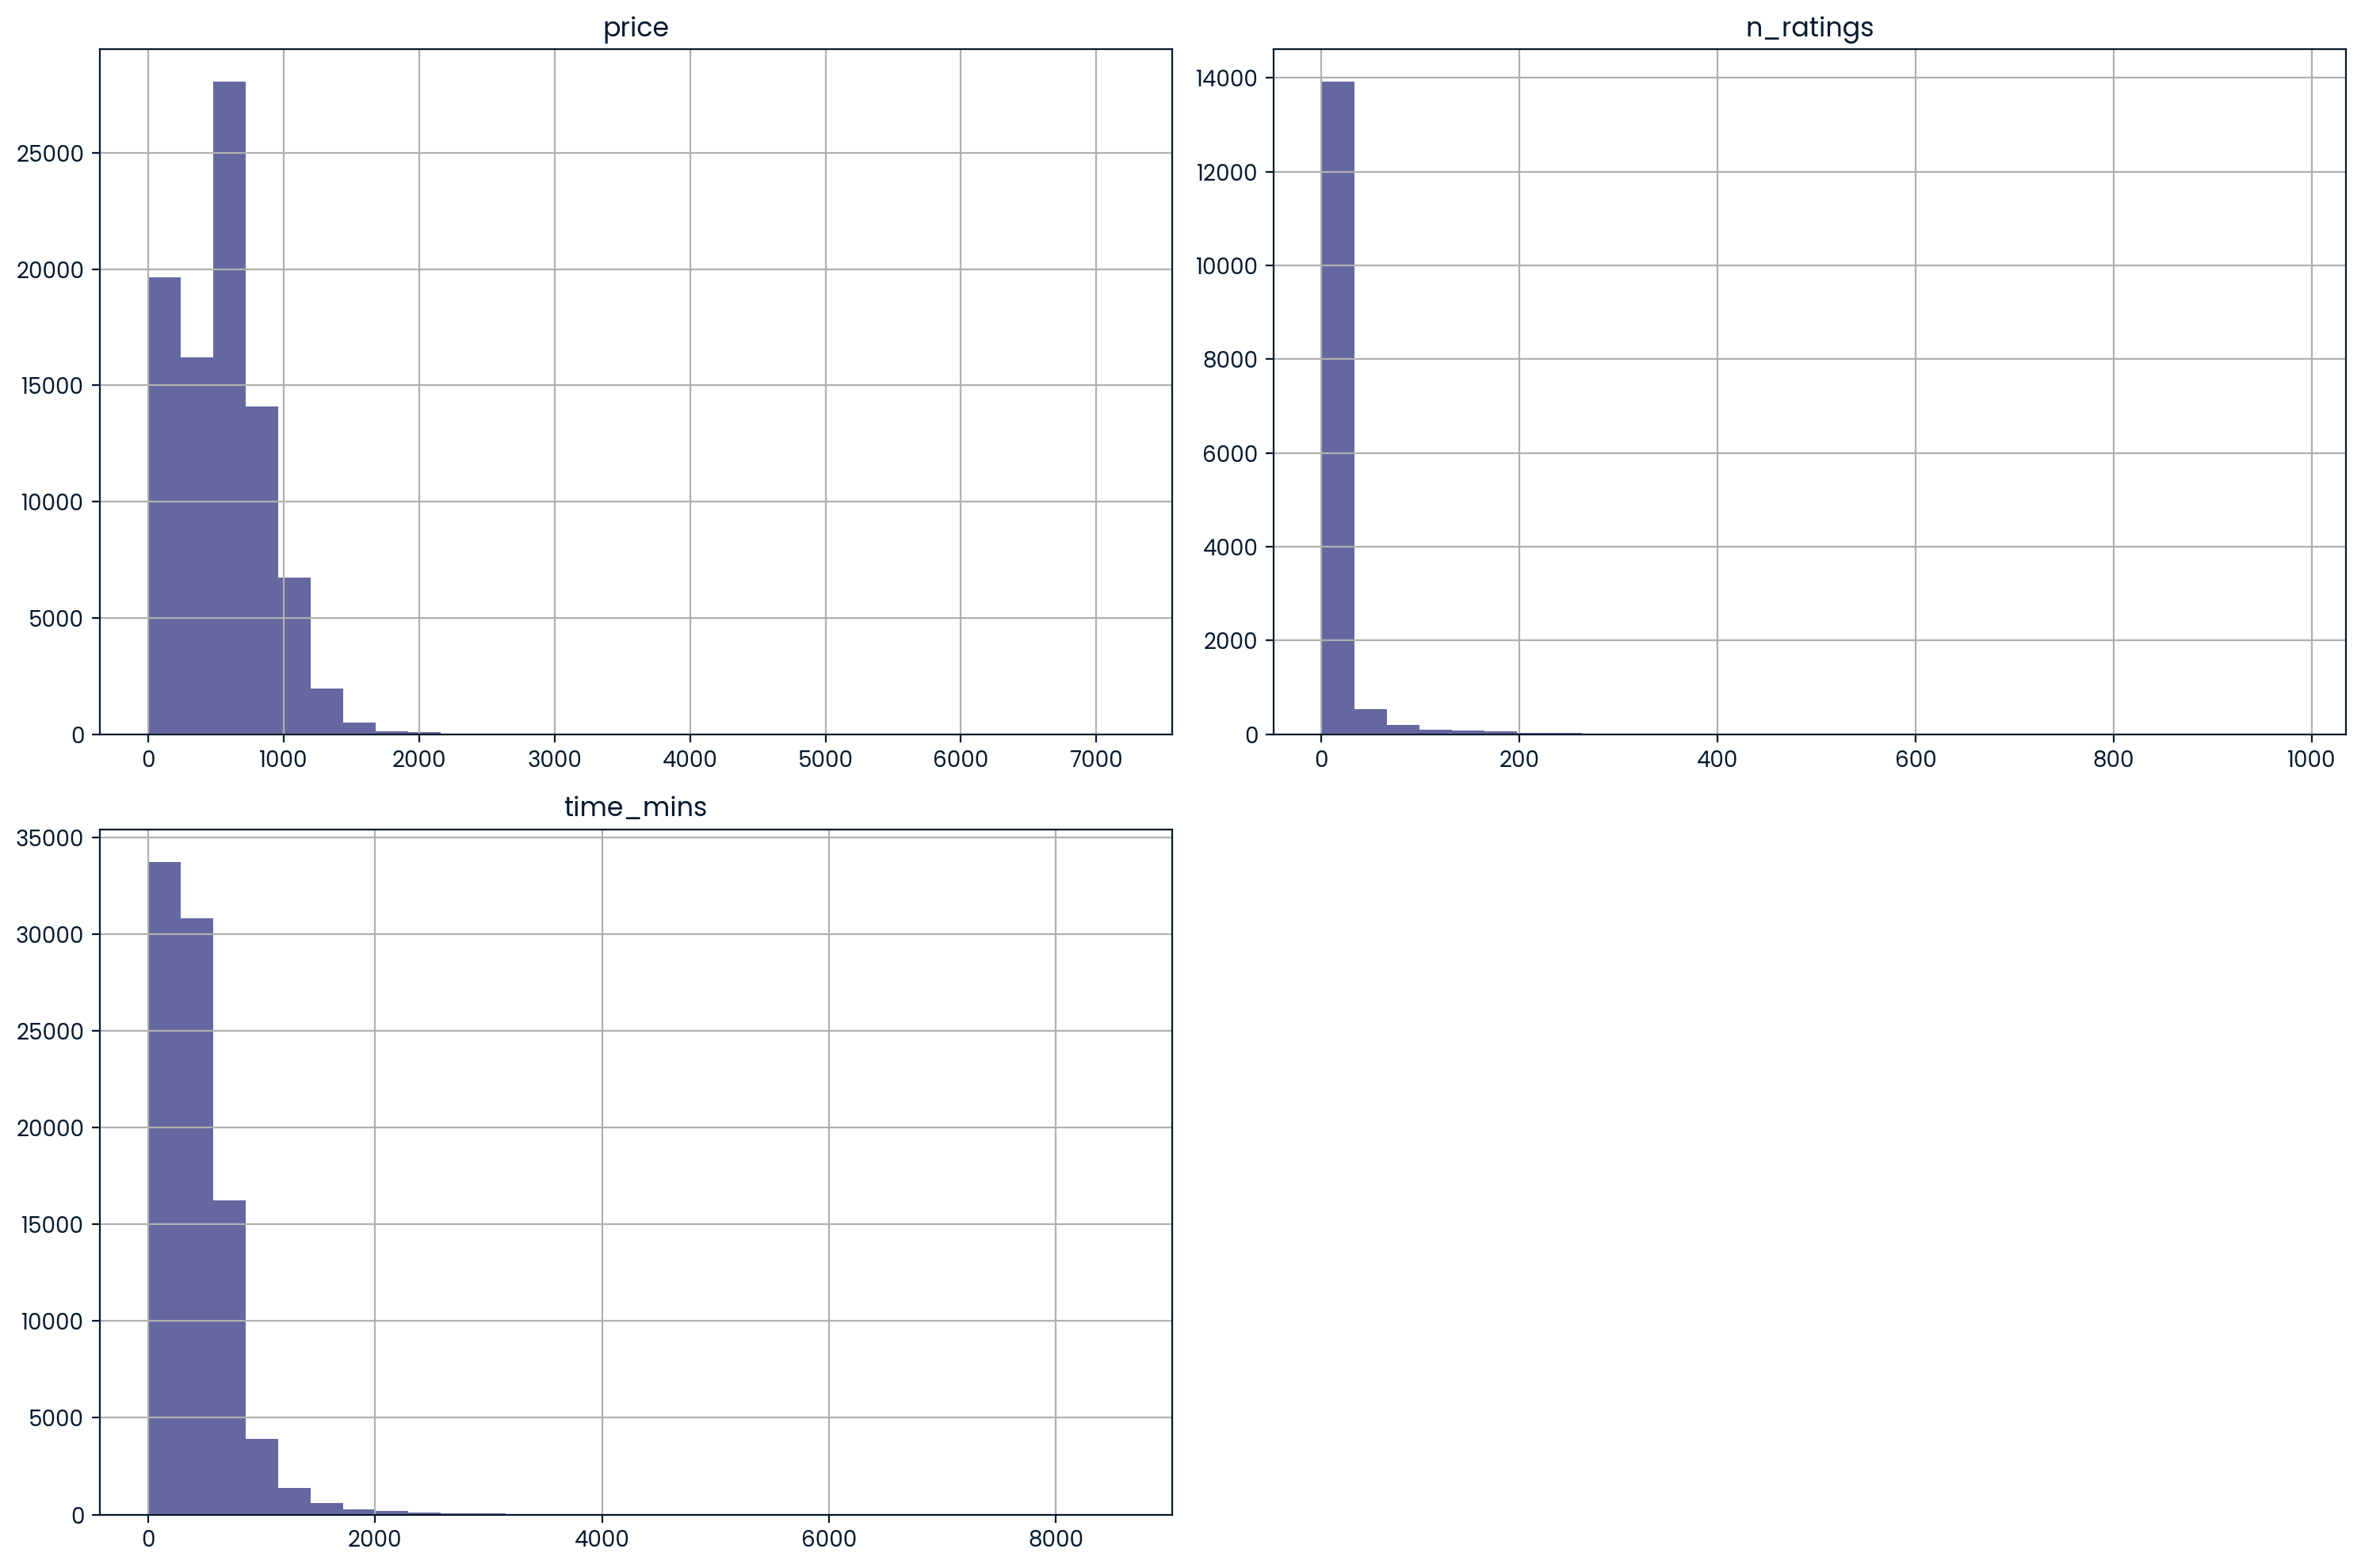

In [22]:
# Plot histograms of all the numerical columns
import matplotlib.pyplot as plt

# Select only the numerical columns
numerical_columns = audible.select_dtypes(include=['number'])

# Plot histograms for each numerical column
numerical_columns.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

Additionally, we can use `.describe()` to look at a summary of our data

In [23]:
# Look at the numeric columns
print(numerical_columns.describe())

              price     n_ratings     time_mins
count  87489.000000  15072.000000  87489.000000
mean     559.009246     14.318206    417.497663
std      336.096642     55.785925    364.559399
min        0.000000      1.000000      1.000000
25%      268.000000      1.000000    142.000000
50%      585.000000      2.000000    386.000000
75%      755.000000      7.000000    584.000000
max     7198.000000    985.000000   8595.000000


In [24]:
# Look at the non numeric columns
audible.describe(exclude=[np.number])

,name,author,narrator,releasedate,language,rating_stars
count,87489,87489,87489,87489,87489,15072.0
unique,82767,48374,29717,5058,36,9.0
top,The Art of War,"矢島雅弘,石橋遊",anonymous,2018-05-16 00:00:00,English,5.0
freq,20,874,1034,773,61884,6761.0
first,NaN,NaN,NaN,1998-12-27 00:00:00,NaN,NaN
last,NaN,NaN,NaN,2025-11-14 00:00:00,NaN,NaN


We will transform the prices in `price` to USD for this exercise. We can use the exchange rate of 1 USD = 0.012 INR:

In [25]:
# Transform prices to USD (multiply times 0.012)
audible['price'] = audible['price'] * 0.12
# Check the results
print(audible['price'])
print(audible['price'].describe())

0         56.16
1         98.40
2         49.20
3         73.80
4         98.40
          ...  
87484     71.52
87485     98.40
87486    112.56
87487     81.60
87488     68.28
Name: price, Length: 87489, dtype: float64
count    87489.000000
mean        67.081109
std         40.331597
min          0.000000
25%         32.160000
50%         70.200000
75%         90.600000
max        863.760000
Name: price, dtype: float64


There values in the `language` column have different capitalization. Let's fix that.

In [26]:
# Inspect the language column before making changes
print(audible['language'].unique())

['English' 'Hindi' 'spanish' 'german' 'french' 'catalan' 'swedish'
 'italian' 'danish' 'finnish' 'dutch' 'hebrew' 'russian' 'polish'
 'galician' 'afrikaans' 'icelandic' 'romanian' 'japanese' 'tamil'
 'portuguese' 'urdu' 'hungarian' 'czech' 'bulgarian' 'mandarin_chinese'
 'basque' 'korean' 'arabic' 'greek' 'turkish' 'ukrainian' 'slovene'
 'norwegian' 'telugu' 'lithuanian']


In [27]:
# Update capitalization in the language column
audible['language'] = audible['language'].str.capitalize()

# Check the results
print(audible['language'].unique())

['English' 'Hindi' 'Spanish' 'German' 'French' 'Catalan' 'Swedish'
 'Italian' 'Danish' 'Finnish' 'Dutch' 'Hebrew' 'Russian' 'Polish'
 'Galician' 'Afrikaans' 'Icelandic' 'Romanian' 'Japanese' 'Tamil'
 'Portuguese' 'Urdu' 'Hungarian' 'Czech' 'Bulgarian' 'Mandarin_chinese'
 'Basque' 'Korean' 'Arabic' 'Greek' 'Turkish' 'Ukrainian' 'Slovene'
 'Norwegian' 'Telugu' 'Lithuanian']


## Task 7: Checking for duplicates

How many duplicates do we have?

As a first step look for duplicates using `.duplicated()` and `.sum()`:

In [28]:
# Look for duplicate rows
print(audible.duplicated().sum())

5


It is useful to look for duplicates only using a subset of the columns that make sense. We will use the following subset of columns:
* name
* author
* narrator
* time_mins
* price

Here we use `.duplicated()` again, but with our subset of columns.

In [29]:
# Create a list of our subset columns and assign to subset_cols
subset_cols = ['name', 'author', 'narrator', 'time_mins', 'price']
# Check for duplicates using our subset of columns
duplicate_count = audible.duplicated(subset=subset_cols).sum()
duplicate_count

70

Let's look at those values (use `keep=false`) and see what is going on:

In [30]:
# Check the duplicated rows keeping the duplicates and order by the name column
duplicates = audible[audible.duplicated(subset=subset_cols, keep=False)]
duplicates_sorted = duplicates.sort_values(by='name')
print(duplicates_sorted)

                                              name  ... time_mins
63978      "Das Böse ist des Menschen beste Kraft"  ...       144
63965      "Das Böse ist des Menschen beste Kraft"  ...       144
24625                         90 Minutes in Heaven  ...       495
24116                         90 Minutes in Heaven  ...       495
16971                                 Adagio in Dm  ...        78
...                                            ...  ...       ...
18338  What I Talk About When I Talk About Running  ...       263
38021                   When Women Ruled the World  ...       555
20260                   When Women Ruled the World  ...       555
22158                                Wings of Fire  ...        75
64428                                Wings of Fire  ...        75

[139 rows x 9 columns]


We can see that the duplicates are for files with different release dates. We can decide to keep the record with the last release date.

We will can use the `drop_duplicates()` method with the same subset and using `keep=last` to keep the last release date

In [31]:
# Drop duplicated rows keeping the last release date
audible.drop_duplicates(subset=subset_cols, keep = 'last', inplace = True)

We can check again for duplicates:

In [32]:
# Check again for duplicates using our subset of columns
print(audible.duplicated(subset=subset_cols).sum())

0


## Task 8: Dealing with missing data

Before we finish, let's take a look at missing data in our columns. We can use the `.isna()` method and chain it with `.sum()` to get the total:

In [33]:
# Check for null values
print(audible.isna().sum())


name                0
author              0
narrator            0
releasedate         0
language            0
price               0
rating_stars    72387
n_ratings       72387
time_mins           0
dtype: int64


We could turn the **NaN** values to 0 or another numeric value, or we could keep them. It depends on our use case.

If we want to plot the ratings distribution, it can make sense to drop audiobooks with no ratings. But if we need to use the distribution of prices for our analysis, then removing audiobooks with no ratings will bias our results (since unrated audiobooks are likely more niche and might have a different pricing structure than rated audiobooks).

We will keep the unrated audiobooks for now.

## Task 9: Save the cleaned data set

We can use the `.to_csv` method to save the clean file. We include `index=False` so that we don't also copy the current index to our destination file.

In [34]:
# Save the dataframe to a new file: 'audible_clean.csv'
audible.to_csv('data/audible_clean.csv', index=False)